Pistes:

- Travailler le dataframe, nettoyage de données etc
- mettre des poids sur les features fonction du périmètre de la feature: W(roads_length_25) > W(roads_length_100) > W(roads_length_500)
- Nouvelle variable : poids des targets y par type d'area --> y_weight_urbgreen, y_weight_hdres, y_weight_ldres, y_weight_industry
- Ajouter une feature classification : par exemple dans hdres_100 on retrouve deux valeurs prépondérantes... --> deux classes ?
- Rajouter une feature calculée en fonction des lands features 
- Intégrer le benchmark comme feature du dataFrame 


- Random Forest w/ random search features --> déterminer les meilleurs paramètres

# <span style="color:black">INPUT Features</span>

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [124]:
df_train_X = pd.read_csv('df_train_X_clean.csv')
df_train_Y = pd.read_csv('train_Y_5fzj9UT.csv')
df_test_X = pd.read_csv('df_test_X_clean.csv')

In [125]:
# Concaténation des features et de la target pour merger les modifications du dataframe
df_train = pd.concat([df_train_X, df_train_Y], axis=1)
df_train = df_train.drop('ID', axis=1)

In [84]:
%%time
# Ajout direct du benchmark, sans boucle
df_train['y_benchmark'] = (df_train['value_0']/df_train['distance_0']+df_train['value_1']/df_train['distance_1']+df_train['value_2']/df_train['distance_2']+df_train['value_3']/df_train['distance_3']+df_train['value_4']/df_train['distance_4']+df_train['value_5']/df_train['distance_5']+df_train['value_6']/df_train['distance_6']+df_train['value_7']/df_train['distance_7']+df_train['value_8']/df_train['distance_8']+df_train['value_9']/df_train['distance_9'])/(1/df_train['distance_0']+1/df_train['distance_1']+1/df_train['distance_2']+1/df_train['distance_3']+1/df_train['distance_4']+1/df_train['distance_5']+1/df_train['distance_6']+1/df_train['distance_7']+1/df_train['distance_8']+1/df_train['distance_9'])

# Sur le test
df_test_X['y_benchmark'] = (df_test_X['value_0']/df_test_X['distance_0']+df_test_X['value_1']/df_test_X['distance_1']+df_test_X['value_2']/df_test_X['distance_2']+df_test_X['value_3']/df_test_X['distance_3']+df_test_X['value_4']/df_test_X['distance_4']+df_test_X['value_5']/df_test_X['distance_5']+df_test_X['value_6']/df_test_X['distance_6']+df_test_X['value_7']/df_test_X['distance_7']+df_test_X['value_8']/df_test_X['distance_8']+df_test_X['value_9']/df_test_X['distance_9'])/(1/df_test_X['distance_0']+1/df_test_X['distance_1']+1/df_test_X['distance_2']+1/df_test_X['distance_3']+1/df_test_X['distance_4']+1/df_test_X['distance_5']+1/df_test_X['distance_6']+1/df_test_X['distance_7']+1/df_test_X['distance_8']+1/df_test_X['distance_9'])

Wall time: 1.15 s


In [75]:
df_test_X.head()

,ID,station_id,hdres_100,hdres_500,ldres_100,ldres_500,industry_100,industry_500,urbgreen_100,urbgreen_500,...,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,y_benchmark
0,0,98,0.0,0.0,0.349,0.503,0.0,0.052,0.651,0.354,...,53.0,48.0,44.0,54.0,40.0,38.0,36.0,42.0,39.0,45.578586
1,1,98,0.0,0.0,0.349,0.503,0.0,0.052,0.651,0.354,...,55.0,50.0,45.0,55.0,41.0,39.0,37.0,43.0,40.0,46.874356
2,2,98,0.0,0.0,0.349,0.503,0.0,0.052,0.651,0.354,...,84.5,62.0,49.0,63.0,47.0,42.0,42.0,49.0,48.0,57.378294
3,3,98,0.0,0.0,0.349,0.503,0.0,0.052,0.651,0.354,...,97.0,67.0,55.0,72.0,58.0,48.0,51.0,59.0,57.0,65.297233
4,4,98,0.0,0.0,0.349,0.503,0.0,0.052,0.651,0.354,...,99.0,75.0,63.0,82.0,67.0,48.0,59.0,65.0,64.0,71.859780


# <span style="color:blue">SAMPLE 5% DATA SET</span>

In [85]:
df_train_sample = pd.DataFrame.sample(df_train, n=40000, random_state=60)
df_test_X_sample = pd.DataFrame.sample(df_test_X, n=10000, random_state=60)

#X_sample=df_train_sample[['station_id','hdres_100','hdres_500','ldres_100','ldres_500','industry_100','industry_500','urbgreen_100','urbgreen_500','roads_length_25','roads_length_100','roads_length_500','major_roads_length_25','major_roads_length_100','major_roads_length_500','value_0','value_1','value_2','value_3','value_4','value_5','value_6','value_7','value_8','value_9']]
#y_sample=df_train_sample['value']
#X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.25, random_state=60)

22 min 11s pour 40 000 lignes de benchmark


#  <span style="color:red">DATA VIZ AND DATA ANALYSIS</span>

In [126]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695255 entries, 0 to 695254
Data columns (total 36 columns):
station_id                695255 non-null int64
hdres_100                 695255 non-null float64
hdres_500                 695255 non-null float64
ldres_100                 695255 non-null float64
ldres_500                 695255 non-null float64
industry_100              695255 non-null float64
industry_500              695255 non-null float64
urbgreen_100              695255 non-null float64
urbgreen_500              695255 non-null float64
roads_length_25           695255 non-null float64
roads_length_100          695255 non-null float64
roads_length_500          695255 non-null float64
major_roads_length_25     695255 non-null float64
major_roads_length_100    695255 non-null float64
major_roads_length_500    695255 non-null float64
distance_0                695255 non-null float64
distance_1                695255 non-null float64
distance_2                695255 non-null

#  <span style="color:black">Lands features</span>

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has

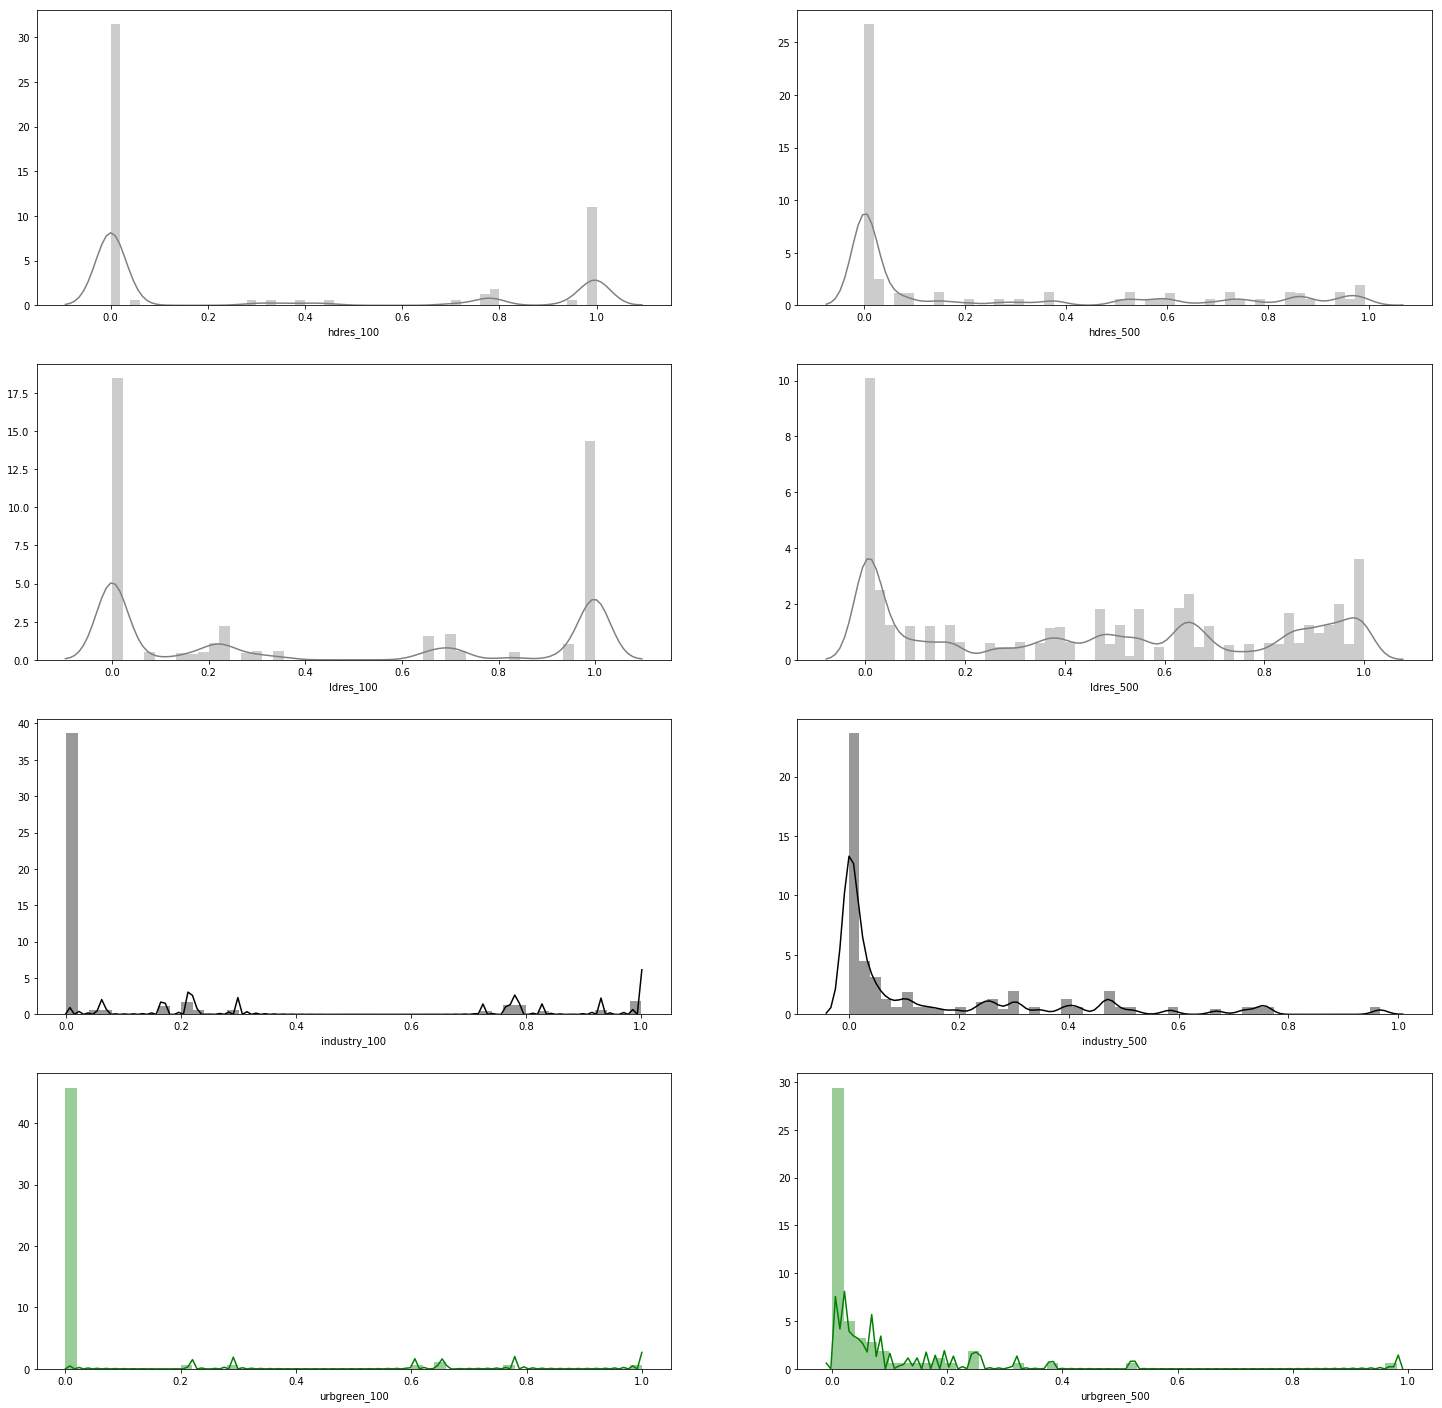

In [40]:
plt.figure(figsize=(25,25))

# high residential areas
plt.subplot(4,2,1)
sns.distplot(df_train['hdres_100'], color='grey')
plt.subplot(4,2,2)
sns.distplot(df_train['hdres_500'], color='grey')

# low residential areas
plt.subplot(4,2,3)
sns.distplot(df_train['ldres_100'], color='grey')
plt.subplot(4,2,4)
sns.distplot(df_train['ldres_500'], color='grey')

# industry areas
plt.subplot(4,2,5)
sns.distplot(df_train['industry_100'], color='black')
plt.subplot(4,2,6)
sns.distplot(df_train['industry_500'], color='black')

# green areas
plt.subplot(4,2,7)
sns.distplot(df_train['urbgreen_100'], color='green')
plt.subplot(4,2,8)
sns.distplot(df_train['urbgreen_500'], color='green')

In [41]:
df_train['ldres_100'].value_counts()

0.000    260559
1.000    187008
0.216     17120
0.224     17088
0.987     10346
0.232      8779
0.659      8779
0.002      8779
0.998      8779
0.717      8779
0.992      8779
0.661      8779
0.707      8779
0.702      8779
0.293      8779
0.226      8675
0.341      8627
0.705      8599
0.005      8436
0.070      8257
0.934      8228
0.953      8185
0.178      8175
0.827      8045
0.277      7342
0.004      7055
0.990      6468
0.138      6438
0.170      6417
0.651      6397
Name: ldres_100, dtype: int64

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has

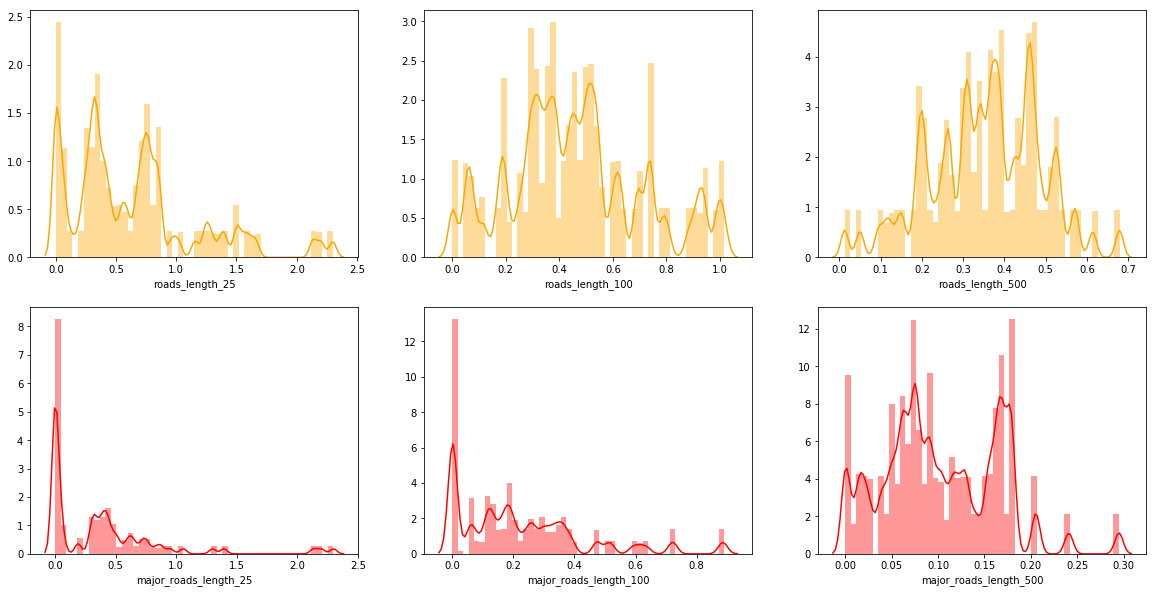

In [42]:
plt.figure(figsize=(20,10))

# roads_length
plt.subplot(2,3,1)
sns.distplot(df_train['roads_length_25'], color='orange')
plt.subplot(2,3,2)
sns.distplot(df_train['roads_length_100'], color='orange')
plt.subplot(2,3,3)
sns.distplot(df_train['roads_length_500'], color='orange')

# major roads_length
plt.subplot(2,3,4)
sns.distplot(df_train['major_roads_length_25'], color='red')
plt.subplot(2,3,5)
sns.distplot(df_train['major_roads_length_100'], color='red')
plt.subplot(2,3,6)
sns.distplot(df_train['major_roads_length_500'], color='red')

#  <span style="color:black">Correlation Matrix</span>

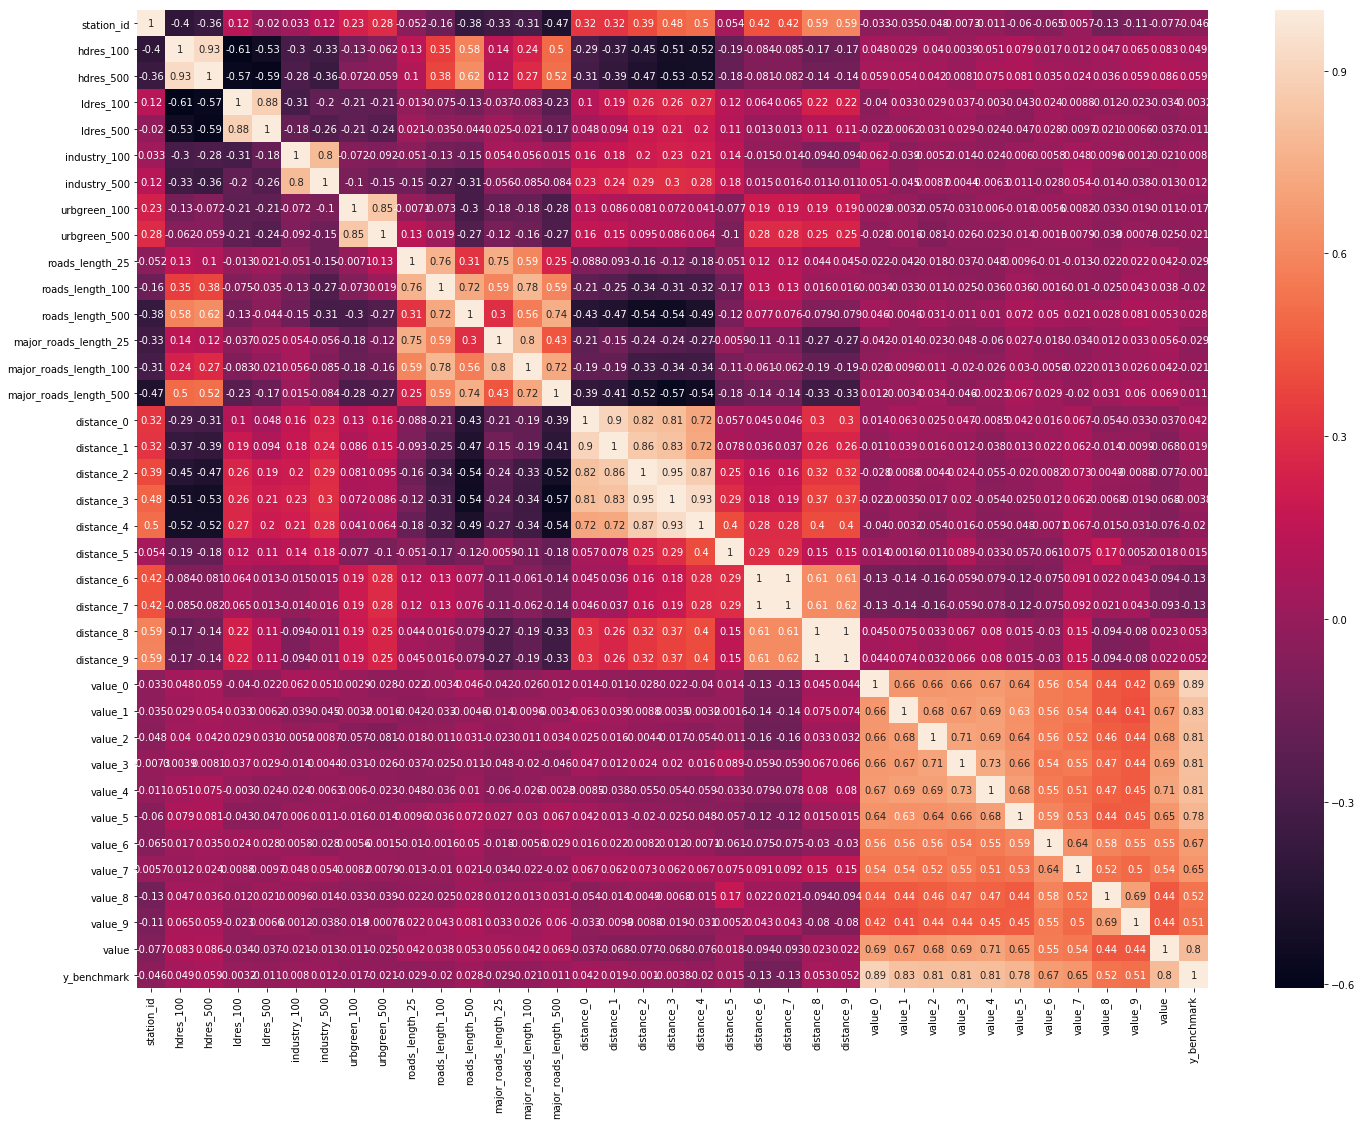

In [43]:
plt.figure(figsize=(24,18))
sns.heatmap(df_train.corr(), annot=True)

#  <span style="color:black">Distances distribution</span>

In [44]:
dist_df = df_train[['distance_0','distance_1','distance_2','distance_3','distance_4','distance_5','distance_6','distance_7','distance_8','distance_9',]]
val_df = df_train[['value_0','value_1','value_2','value_3','value_4','value_5','value_6','value_7','value_8','value_9']]
val_df_test = df_test_X[['value_0','value_1','value_2','value_3','value_4','value_5','value_6','value_7','value_8','value_9']]
val_list = ['value_0','value_1','value_2','value_3','value_4','value_5','value_6','value_7','value_8','value_9']

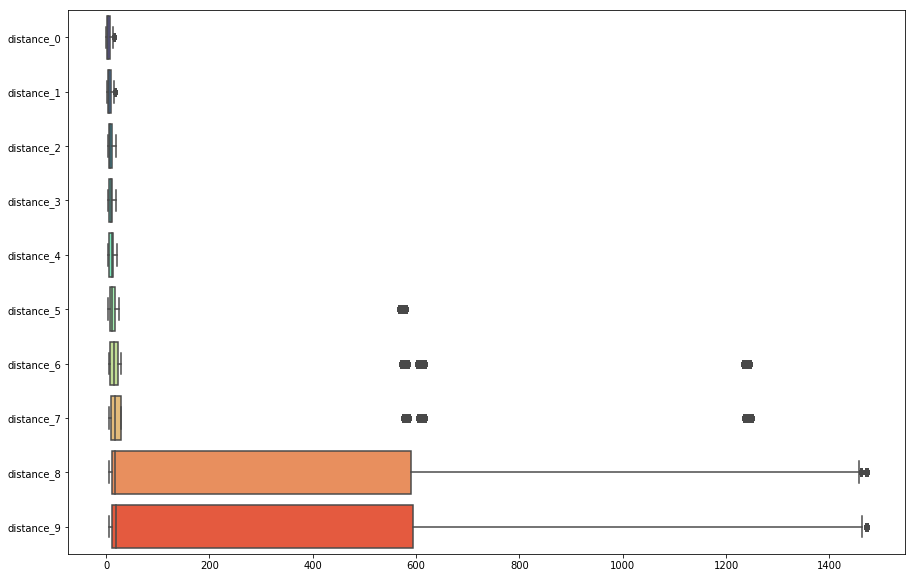

In [45]:
plt.figure(figsize=(15,10))
sns.boxplot(data=dist_df,palette='rainbow',orient='h')

Les distances sont ordonnées par ordre croissant : distance_0 < distance_1 < ... < distance_8 < distance_9
Trois types de distances :
- Petites distances, 0 - 1 - 2 - 3 - 4
- Moyennes distances, 5 - 6 - 7
- Grandes distances, 8 - 9

#  <span style="color:black">Values distribution</span>

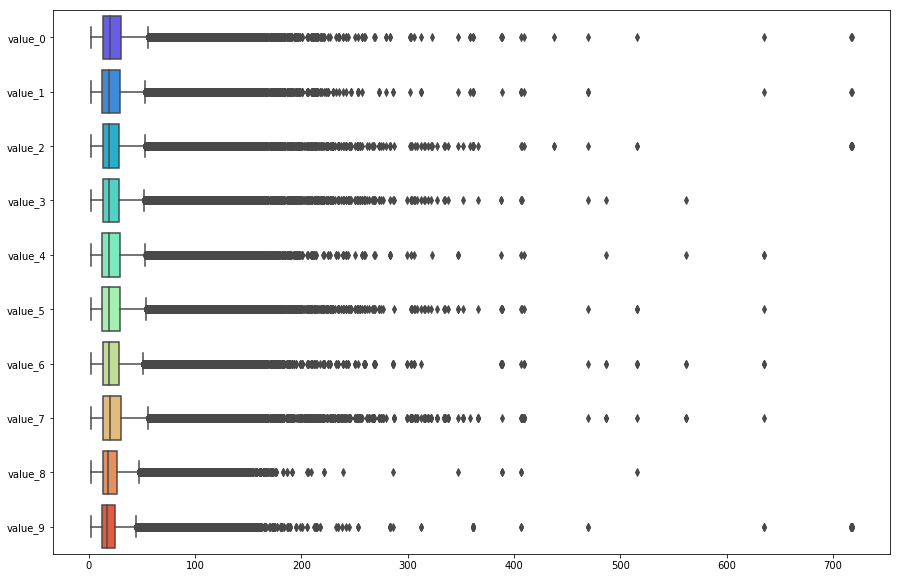

In [46]:
plt.figure(figsize=(15,10))
sns.boxplot(data=val_df,palette='rainbow',orient='h')

In [47]:
for val in val_list:
    df_train.drop(df_train[df_train[val]>350].index, inplace=True)
    df_test_X.drop(df_test_X[df_test_X[val]>350].index, inplace=True)

In [48]:
val_df = df_train[['value_0','value_1','value_2','value_3','value_4','value_5','value_6','value_7','value_8','value_9']]
val_df_test = df_test_X[['value_0','value_1','value_2','value_3','value_4','value_5','value_6','value_7','value_8','value_9']]

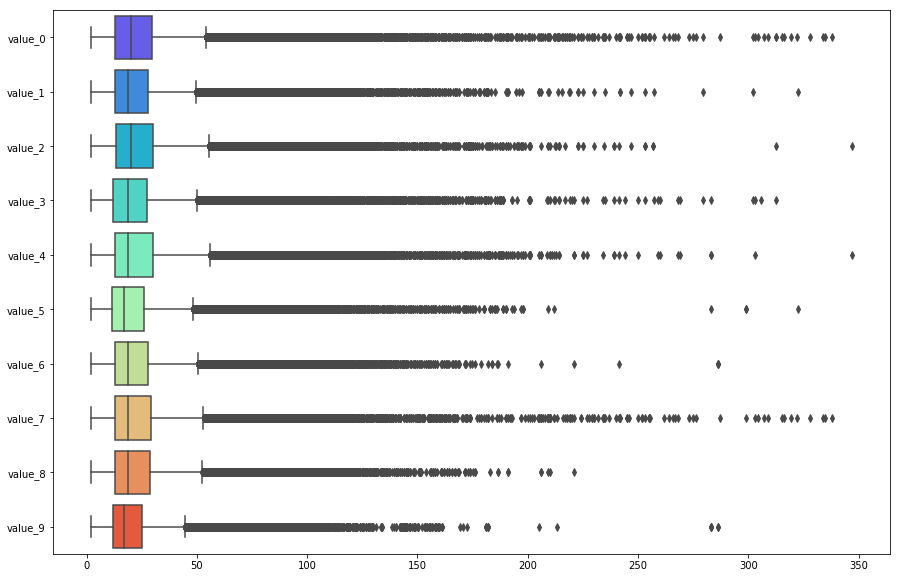

In [49]:
plt.figure(figsize=(15,10))
sns.boxplot(data=val_df_test,palette='rainbow',orient='h')

In [50]:
df_train['value_0'].value_counts(sort=True, ascending=False, bins=10)

(1.6540000000000001, 36.5]    579607
(36.5, 71.0]                  101066
(71.0, 105.5]                  11529
(105.5, 140.0]                  2225
(140.0, 174.5]                   469
(174.5, 209.0]                   119
(209.0, 243.5]                    36
(243.5, 278.0]                     9
(278.0, 312.5]                     8
(312.5, 347.0]                     3
Name: value_0, dtype: int64

#  <span style="color:black">Target distribution</span>

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


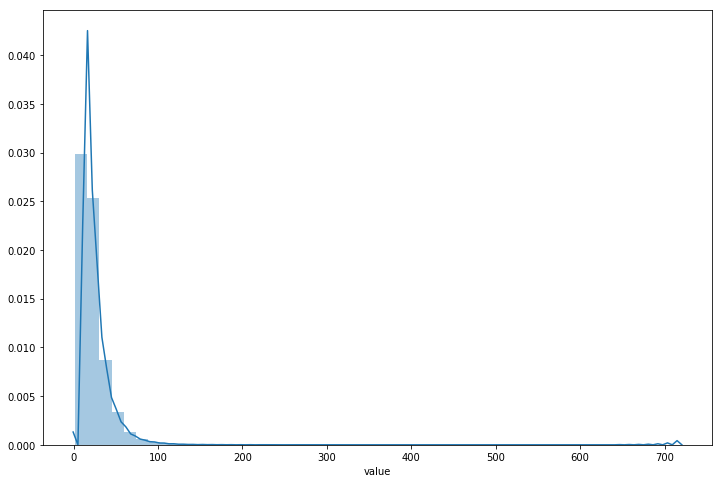

In [86]:
plt.figure(figsize=(12,8))
sns.distplot(df_train['value'])

Elimination des lignes dont la target est < 85 ?

In [87]:
len(df_train[df_train['value']>90])

5485

In [88]:
df_train['value'].value_counts(sort=True, ascending=False, bins=10)

(1.2830000000000001, 73.6]    683457
(73.6, 145.2]                  11099
(145.2, 216.8]                   579
(216.8, 288.4]                    82
(288.4, 360.0]                    21
(360.0, 431.6]                     9
(431.6, 503.2]                     3
(646.4, 718.0]                     2
(503.2, 574.8]                     2
(574.8, 646.4]                     1
Name: value, dtype: int64

In [89]:
# On retire toutes les lignes du DF dont les targets sont > 90
df_train.drop(df_train[df_train['value']>90].index, inplace=True)

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


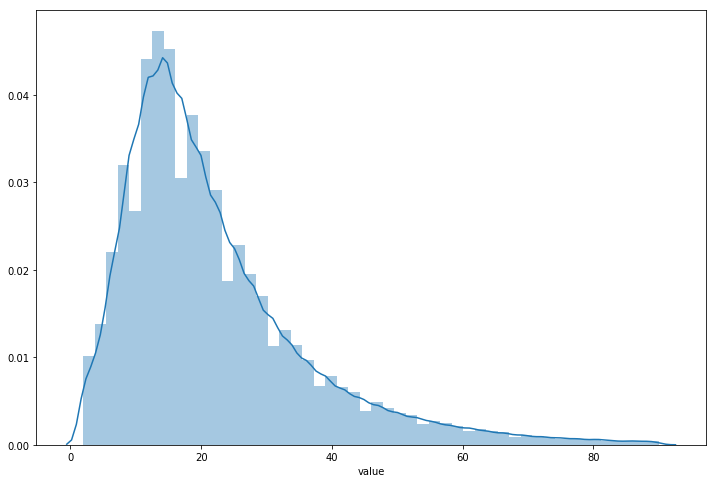

In [90]:
plt.figure(figsize=(12,8))
sns.distplot(df_train['value'])

#  <span style="color:red">--> WEIGHT FEATURES</span>

In [56]:
# DATA FRAME TRAIN
#df_train['Global_roads'] = (df_train['roads_length_25']*20 + df_train['roads_length_100']*5 + df_train['roads_length_500'])/26
#df_train['Global_major_roads'] = (df_train['major_roads_length_25']*20 + df_train['major_roads_length_100']*5 + df_train['major_roads_length_500'])/26

#df_train['Global_hdres'] = (df_train['hdres_100']*5 + df_train['hdres_500'])/6
#df_train['Global_ldres'] = (df_train['ldres_100']*5 + df_train['ldres_500'])/6

#df_train['Global_industry'] = (df_train['industry_100']*5 + df_train['industry_500'])/6

#df_train['Global_urbgreen'] = (df_train['urbgreen_100']*5 + df_train['urbgreen_500'])/6

In [57]:
# DATA FRAME TEST
#df_test_X['Global_roads'] = (df_test_X['roads_length_25']*20 + df_test_X['roads_length_100']*5 + df_test_X['roads_length_500'])/26
#df_test_X['Global_major_roads'] = (df_test_X['major_roads_length_25']*20 + df_test_X['major_roads_length_100']*5 + df_test_X['major_roads_length_500'])/26

#df_test_X['Global_hdres'] = (df_test_X['hdres_100']*5 + df_test_X['hdres_500'])/6
#df_test_X['Global_ldres'] = (df_test_X['ldres_100']*5 + df_test_X['ldres_500'])/6

#df_test_X['Global_industry'] = (df_test_X['industry_100']*5 + df_test_X['industry_500'])/6

#df_test_X['Global_urbgreen'] = (df_test_X['urbgreen_100']*5 + df_test_X['urbgreen_500'])/6

In [58]:
df_train.head()

,station_id,hdres_100,hdres_500,ldres_100,ldres_500,industry_100,industry_500,urbgreen_100,urbgreen_500,roads_length_25,...,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,value,y_benchmark
0,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,0.712,...,52.0,44.0,40.0,38.0,54.0,36.0,39.0,42.0,48.0,47.566919
1,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,0.712,...,54.0,45.0,41.0,39.0,55.0,37.0,40.0,43.0,50.0,49.013459
2,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,0.712,...,78.0,49.0,47.0,42.0,63.0,42.0,48.0,49.0,62.0,64.753392
3,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,0.712,...,84.0,55.0,58.0,48.0,72.0,51.0,57.0,59.0,67.0,73.455677
4,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,0.712,...,95.0,63.0,67.0,48.0,82.0,59.0,64.0,65.0,75.0,79.559391


In [59]:
df_test_X.head()

,ID,station_id,hdres_100,hdres_500,ldres_100,ldres_500,industry_100,industry_500,urbgreen_100,urbgreen_500,...,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,y_benchmark
0,0,98,0.0,0.0,0.349,0.503,0.0,0.052,0.651,0.354,...,53.0,48.0,44.0,54.0,40.0,38.0,36.0,42.0,39.0,45.578586
1,1,98,0.0,0.0,0.349,0.503,0.0,0.052,0.651,0.354,...,55.0,50.0,45.0,55.0,41.0,39.0,37.0,43.0,40.0,46.874356
2,2,98,0.0,0.0,0.349,0.503,0.0,0.052,0.651,0.354,...,84.5,62.0,49.0,63.0,47.0,42.0,42.0,49.0,48.0,57.378294
3,3,98,0.0,0.0,0.349,0.503,0.0,0.052,0.651,0.354,...,97.0,67.0,55.0,72.0,58.0,48.0,51.0,59.0,57.0,65.297233
4,4,98,0.0,0.0,0.349,0.503,0.0,0.052,0.651,0.354,...,99.0,75.0,63.0,82.0,67.0,48.0,59.0,65.0,64.0,71.859780


#  <span style="color:blue">Reduce dimensions</span>

In [60]:
from sklearn.decomposition import PCA

In [61]:
pca=PCA(n_components=20)

In [62]:
X=df_train[['station_id','hdres_100','hdres_500','ldres_100','ldres_500','industry_100','industry_500','urbgreen_100','urbgreen_500','roads_length_25','roads_length_100','roads_length_500','major_roads_length_25','major_roads_length_100','major_roads_length_500','distance_0','distance_1','distance_2','distance_3','distance_4','distance_5','distance_6','distance_7','distance_8','distance_9','value_0','value_1','value_2','value_3','value_4','value_5','value_6','value_7','value_8','value_9','y_benchmark']]

In [63]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [64]:
print(pca.explained_variance_ratio_)

[8.07978399e-01 1.65007951e-01 2.32551906e-02 1.77074694e-03
 8.86196537e-04 2.45637248e-04 1.38948904e-04 1.21650848e-04
 1.11437802e-04 1.03239673e-04 9.23884746e-05 8.24978778e-05
 7.08607009e-05 6.14534430e-05 5.41696696e-05 6.71118432e-06
 5.00082871e-06 1.98296623e-06 1.71478396e-06 1.07201894e-06]


#  <span style="color:red">Nettoyage poussé sur les lands features</span>

In [65]:
df_train['roads_length_500'].value_counts(sort=True, ascending=False, bins=20)

(0.446, 0.479]                    101036
(0.313, 0.346]                     76610
(0.346, 0.379]                     71613
(0.18, 0.213]                      65676
(0.379, 0.413]                     58316
(0.246, 0.279]                     48900
(0.279, 0.313]                     48306
(0.513, 0.546]                     43179
(0.413, 0.446]                     34208
(0.479, 0.513]                     25117
(0.213, 0.246]                     23559
(0.546, 0.579]                     17492
(0.113, 0.146]                     16742
(0.0796, 0.113]                    15196
(0.0463, 0.0796]                    8779
(0.011300000000000001, 0.0463]      8779
(0.146, 0.18]                       8779
(0.646, 0.679]                      8751
(0.612, 0.646]                      8572
(0.579, 0.612]                         0
Name: roads_length_500, dtype: int64

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


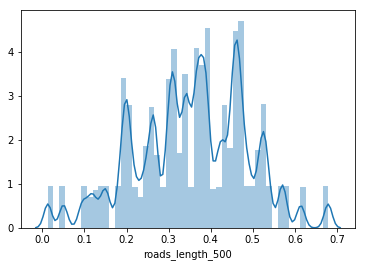

In [66]:
sns.distplot(df_train['roads_length_500'])

#  <span style="color:green">CSV SAVE</span>

In [127]:
pd.DataFrame.to_csv(df_train, 'df_train_1.csv', sep=',', index=False)

In [128]:
pd.DataFrame.to_csv(df_test_X, 'df_test_X1.csv', sep=',', index=False)

#  <span style="color:green">CSV_sample ~ 5% SAVE</span>

In [93]:
pd.DataFrame.to_csv(df_train_sample, 'df_train_sample.csv', sep=',', index=False)

In [94]:
pd.DataFrame.to_csv(df_test_X_sample, 'df_test_X_sample.csv', sep=',', index=False)

In [ ]:
RF_defaut_0 = 72.97
ET_defaut_0 = 74.05
#---
RF_defaut_ajust = 75.90
ET_defaut_ajust = 76.65
#---
RF_benchmark = 75.78
ET_benchmark = 76.56
#---
RF_randomized = 79.52
ET_randomized = 

In [ ]:
# sans distance et value mais benchmark
RF = 66.26
ET = 63.98
# sans les features à 100 (que les areas) mais avec benchmark
RF = 75.34
ET = 76.28
# sans les features à 100 (que les areas) mais avec benchmark ajusté
RF = 75.8
ET = 76.69
# sans les features à 100 (areas + routes) mais avec benchmark non ajusté
RF = 75.35
ET = 76.15
# sans les features à 100 (areas + routes) mais avec benchmark ajusté
RF = 75.78
ET = 76.53

In [121]:
result_rf = [72.97,75.90,75.78,75.8,79.52]
result_et = [74.05,76.65,76.56,76.69,79]

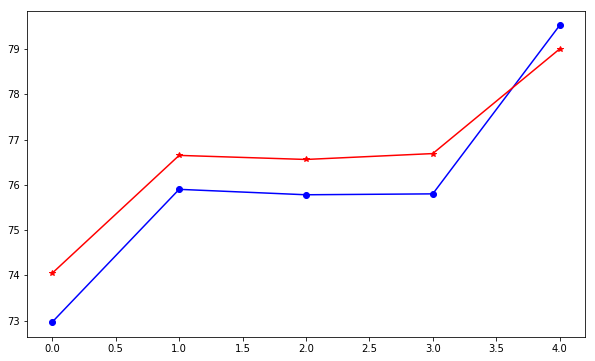

In [122]:
plt.figure(figsize=(10,6))
p1=plt.plot(result_rf, 'blue', marker='o')
plt.hold
p2=plt.plot(result_et, 'red', marker='*')
plt.show()